Test the behaviour of scipy.signal.welch and scipy.signal.spectrogrm when using different windowing function and npersegs.
We are ultimately interested in how the output of the different methods relate to one another

In [45]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import numpy as np
from scipy.signal import welch, spectrogram
from scipy.signal.windows import get_window
import matplotlib.pyplot as plt


In [50]:
xrg = np.arange(0.0, 1.0, 0.001)

data1 = np.sin(2. * np.pi * xrg * 16.0)

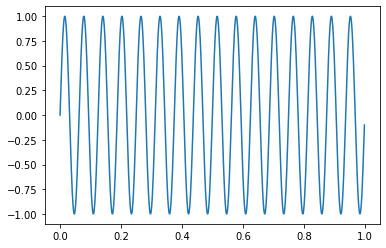

In [51]:
plt.plot(xrg, data1)

In [104]:
res1 = welch(data1, nfft=256, window="hann", scaling="spectrum", nperseg=256)
res1[1][:10]

array([3.72339199e-04, 1.09286287e-04, 9.00600587e-05, 9.19416238e-02,
       4.94037588e-01, 1.63736574e-01, 1.78424577e-04, 9.50979567e-06,
       1.42186562e-06, 3.40820163e-07])

(0.0, 0.1)

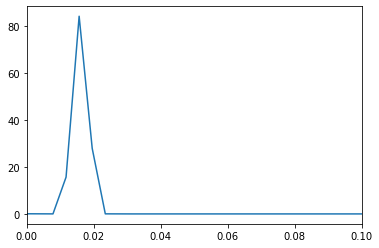

In [98]:
plt.plot(res1[0], res1[1])
plt.xlim(0.0, 0.1)

In [105]:
res2 = spectrogram(data1, nfft=256, nperseg=256, window="hann", scaling="spectrum", mode="psd")

[3.72339199e-04 1.09286287e-04 9.00600587e-05 9.19416238e-02
 4.94037588e-01 1.63736574e-01 1.78424577e-04 9.50979567e-06
 1.42186562e-06 3.40820163e-07]
[3.65370830e-04 1.07627436e-04 8.98627771e-05 9.19376190e-02
 4.94043811e-01 1.63734056e-01 1.78485303e-04 9.52036963e-06
 1.42503052e-06 3.42045557e-07]


In [133]:
res3 = spectrogram(data1, nfft=256, nperseg=256, window="hann", scaling="spectrum", mode="complex")

In [154]:
win = get_window("hann", 256)
scale = 1. / win.sum()**2.
rs = np.sqrt(scale)
print(rs)
res3_2 = res3[2] * np.conjugate(res3[2])# * rs
res3_2 = res3_2.real

0.0078125


In [155]:
print(res1[1][:10])
print(res2[2].mean(axis=1)[:10])
print(res3_2.mean(axis=1)[:10])

[3.72339199e-04 1.09286287e-04 9.00600587e-05 9.19416238e-02
 4.94037588e-01 1.63736574e-01 1.78424577e-04 9.50979567e-06
 1.42186562e-06 3.40820163e-07]
[3.65370830e-04 1.07627436e-04 8.98627771e-05 9.19376190e-02
 4.94043811e-01 1.63734056e-01 1.78485303e-04 9.52036963e-06
 1.42503052e-06 3.42045557e-07]
[3.65370830e-04 5.38137179e-05 4.49313885e-05 4.59688095e-02
 2.47021906e-01 8.18670281e-02 8.92426516e-05 4.76018481e-06
 7.12515259e-07 1.71022779e-07]


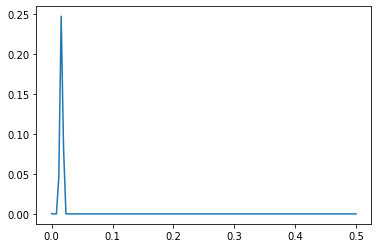

In [156]:
plt.plot(res3[0], np.abs(res3_2.mean(axis=1)))

(0.0, 0.05)

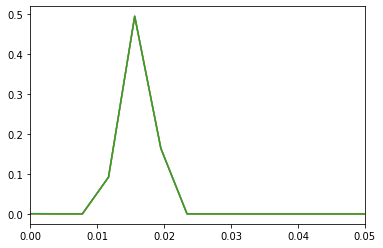

In [161]:
plt.plot(res1[0], res1[1])
plt.plot(res2[0], res2[2].mean(axis=1))
plt.plot(res3[0], res3_2.mean(axis=1) * 2.)
plt.xlim((0.0, 0.05))